In [1]:
#Importing Libraries
import numpy as np #To handle Mathematical calculations
import matplotlib.pyplot as plt #To plot charts 
%matplotlib inline
import pandas as pd #TO import and manage datasets
import glob
import os
# pd.set_option('display.max_columns', None)  
# pd.set_option('display.max_rows', None)  

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#Combining All Offensive Data
path = r'../Datasets/Whoscored/Player-Stats'
folder = glob.glob(path + "/*Offensive*.csv")

li = []

for file in folder:
    individualOffensivePlayerDataframe = pd.read_csv(file)
    league = os.path.basename(file).split('-')[0]
    season = os.path.basename(file).split('-')[2]
    individualOffensivePlayerDataframe['League'] = league
    individualOffensivePlayerDataframe['Season'] = season
    for index, row in individualOffensivePlayerDataframe.iterrows():
        age = int(row["Age"]) - (2018-int(row["Season"]))
        individualOffensivePlayerDataframe.set_value(index, 'Age', age)
        
        #Cleaning Apps column
        if '(' in row["Apps"] :
            apps = int(row["Apps"].split("(")[0])
            individualOffensivePlayerDataframe.set_value(index, 'Apps', apps)
        else :
            apps = int(row["Apps"])
            individualOffensivePlayerDataframe.set_value(index, 'Apps', apps)
            
#     individualOffensivePlayerDataframe = individualOffensivePlayerDataframe.drop_duplicates(subset=['Name'], keep='first')
    li.append(individualOffensivePlayerDataframe)

combinedOffensivePlayerDataframe = pd.concat(li)

In [3]:
#Combining All Defensive Data
path = r'../Datasets/Whoscored/Player-Stats'
folder = glob.glob(path + "/*Defensive*.csv")

li = []

for file in folder:
    individualOffensivePlayerDataframe = pd.read_csv(file)
    league = os.path.basename(file).split('-')[0]
    season = os.path.basename(file).split('-')[2]
    individualOffensivePlayerDataframe['League'] = league
    individualOffensivePlayerDataframe['Season'] = season
    for index, row in individualOffensivePlayerDataframe.iterrows():
        age = int(row["Age"]) - (2018-int(row["Season"]))
        individualOffensivePlayerDataframe.set_value(index, 'Age', age)
        
        #Cleaning Apps column
        if '(' in row["Apps"] :
            apps = int(row["Apps"].split("(")[0])
            individualOffensivePlayerDataframe.set_value(index, 'Apps', apps)
        else :
            apps = int(row["Apps"])
            individualOffensivePlayerDataframe.set_value(index, 'Apps', apps)
    
#     individualOffensivePlayerDataframe = individualOffensivePlayerDataframe.drop_duplicates(subset=['Name'], keep='first')
    li.append(individualOffensivePlayerDataframe)

combinedDefensivePlayerDataframe = pd.concat(li)

In [4]:
#Combining All Passing Data
path = r'../Datasets/Whoscored/Player-Stats'
folder = glob.glob(path + "/*Passing*.csv")

li = []

for file in folder:
    individualOffensivePlayerDataframe = pd.read_csv(file)
    league = os.path.basename(file).split('-')[0]
    season = os.path.basename(file).split('-')[2]
    individualOffensivePlayerDataframe['League'] = league
    individualOffensivePlayerDataframe['Season'] = season
    for index, row in individualOffensivePlayerDataframe.iterrows():
        age = int(row["Age"]) - (2018-int(row["Season"]))
        individualOffensivePlayerDataframe.set_value(index, 'Age', age)
        
        #Cleaning Apps column
        if '(' in row["Apps"] :
            apps = int(row["Apps"].split("(")[0])
            individualOffensivePlayerDataframe.set_value(index, 'Apps', apps)
        else :
            apps = int(row["Apps"])
            individualOffensivePlayerDataframe.set_value(index, 'Apps', apps)
    
#     individualOffensivePlayerDataframe = individualOffensivePlayerDataframe.drop_duplicates(subset=['Name'], keep='first')
    li.append(individualOffensivePlayerDataframe)

combinedPassingPlayerDataframe = pd.concat(li)

In [5]:
#Combining All Summary Data
path = r'../Datasets/Whoscored/Player-Stats'
folder = glob.glob(path + "/*Summary*.csv")

li = []

for file in folder:
    individualOffensivePlayerDataframe = pd.read_csv(file)
    league = os.path.basename(file).split('-')[0]
    season = os.path.basename(file).split('-')[2]
    individualOffensivePlayerDataframe['League'] = league
    individualOffensivePlayerDataframe['Season'] = season
    for index, row in individualOffensivePlayerDataframe.iterrows():
        age = int(row["Age"]) - (2018-int(row["Season"]))
        individualOffensivePlayerDataframe.set_value(index, 'Age', age)
        
        #Cleaning Apps column
        if '(' in row["Apps"] :
            apps = int(row["Apps"].split("(")[0])
            individualOffensivePlayerDataframe.set_value(index, 'Apps', apps)
        else :
            apps = int(row["Apps"])
            individualOffensivePlayerDataframe.set_value(index, 'Apps', apps)
    
#     individualOffensivePlayerDataframe = individualOffensivePlayerDataframe.drop_duplicates(subset=['Name'], keep='first')
    li.append(individualOffensivePlayerDataframe)

combinedSummaryPlayerDataframe = pd.concat(li)

In [6]:
#combining all the DFs'

combinedPlayerDataframe = pd.concat([combinedOffensivePlayerDataframe, combinedDefensivePlayerDataframe, combinedPassingPlayerDataframe, combinedSummaryPlayerDataframe], axis=1)

combinedPlayerDataframe = combinedPlayerDataframe.loc[:,~combinedPlayerDataframe.columns.duplicated()]

#Removing all the goal keepers to test whether it improves the accuracy of the model.
combinedFieldPlayersDf = combinedPlayerDataframe[combinedPlayerDataframe.Position != 'GK']

#Removing field players who have played less than 10 matches
#combinedProperFieldPlayersDf = combinedFieldPlayersDf[~(combinedFieldPlayersDf['Apps'] < 8)]  

In [7]:
combinedFieldPlayersDf

,Name,Team,Age,Position,Apps,Minutes,Total goals,Total Assists,Shots per game,Key passes per game,...,Passes per game,Pass success percentage,Crosses per game,Long balls per game,Through balls per game,Total Goals,Yellow cards,Red cards,Aerials won per game,Man of the match
0,Arjen Robben,Bayern Munich,26,"M(CLR),FW",18,1779,16,6,3.4,1.8,...,34.3,80.2,1.5,2,0.2,16,1,-,0.4,8
1,Stefan Kießling,Bayer Leverkusen,26,FW,33,2924,21,5,3,1.6,...,32.5,72.4,0.2,0.4,0.1,21,3,-,2.1,6
2,Zvjezdan Misimovic,Wolfsburg,28,"AM(C),FW",31,2768,10,13,2.4,3.3,...,51.1,77.5,2.5,5.7,0.5,10,7,-,0.2,8
3,Edin Dzeko,Wolfsburg,24,FW,33,3003,22,7,4.5,1.1,...,19.5,70.7,0.2,1.1,0.1,22,4,-,0.7,6
4,Claudio Pizarro,Werder Bremen,31,"AM(C),FW",23,2130,16,2,2.6,1.3,...,24.2,75.5,0.1,0.8,-,16,4,-,0.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,Nicky Medja Beloko,Fiorentina,19,Midfielder,0,45,-,-,-,-,...,10,50,-,-,-,-,1,-,1,-
566,Stephy Mavididi,Juventus,21,Forward,0,21,-,-,-,-,...,4,100,-,-,-,-,-,-,-,-
567,Guido Guerrieri,Lazio,23,Goalkeeper,1,90,-,-,-,-,...,27,66.7,-,4,-,-,-,-,-,-
568,Carlo Pinsoglio,Juventus,29,Goalkeeper,1,90,-,-,-,-,...,30,70,-,9,-,-,-,-,-,-


In [8]:
allColumns = combinedFieldPlayersDf.columns.tolist()
pivotColumns = allColumns
pivotColumns.remove('Name')
pivotColumns.remove('Season')
pivotColumns

['Team',
 'Age',
 'Position',
 'Apps',
 'Minutes',
 'Total goals',
 'Total Assists',
 'Shots per game',
 'Key passes per game',
 'Dribbles per game',
 'Fouled per game',
 'Offsides per game',
 'Dispossessed per game',
 'Bad control per game',
 'Rating',
 'League',
 'Tackles per game',
 'Interceptions per game',
 'Fouls per game',
 'Clearances per game',
 'Dribbled past per game',
 'Outfield blocks per game',
 'Own goals',
 'Passes per game',
 'Pass success percentage',
 'Crosses per game',
 'Long balls per game',
 'Through balls per game',
 'Total Goals',
 'Yellow cards',
 'Red cards',
 'Aerials won per game',
 'Man of the match']

In [9]:
nameSeasonPivotDf = combinedFieldPlayersDf.pivot_table(index=['Name'], columns=['Season'],
                     values=pivotColumns, aggfunc='first').reset_index()

In [10]:
nameSeasonPivotDf = nameSeasonPivotDf.replace('-', 0)
nameSeasonPivotDf

Name Aerials won per game                                \
Season                                   2009 2010 2011 2012 2013 2014 2015   
0        Aaron Cresswell                  NaN  NaN  NaN  NaN  NaN  1.4  1.1   
1           Aaron Hughes                  2.4  2.8  1.8  2.9  3.2  NaN  NaN   
2             Aaron Hunt                  0.2  0.2  0.6  0.6  1.1  0.4  1.1   
3           Aaron Lennon                    0  0.1  0.2  0.2  0.1  0.2    0   
4       Aaron Leya Iseka                  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...                  ...                  ...  ...  ...  ...  ...  ...  ...   
8570       Óscar Serrano                  0.2    0  0.1  NaN  NaN  NaN  NaN   
8571         Óscar Trejo                  NaN  NaN  0.5  NaN  0.7  0.4  0.5   
8572         Ömer Toprak                  0.2  0.6    1  1.7  3.3  3.8  2.9   
8573      Özkan Yildirim                  NaN  NaN  NaN  0.5  0.2    1    1   
8574        Ümit Korkmaz                  0.2    0  NaN  NaN  NaN  NaN  NaN   

                  ... Yellow cards                                          \
Season 2016 2017  ...         2009 2010 2011 2012 2013 2014 2015 2016 2017   
0       1.4  1.6  ...          NaN  NaN  NaN  NaN  NaN    5    1    2    7   
1       NaN  NaN  ...            2    0    0    1    2  NaN  NaN  NaN  NaN   
2       0.6  0.7  ...            3    2    0    3    2    1    2    3    1   
3         0  0.5  ...            1    1    1    1    1    2    1    0    2   
4       0.8  NaN  ...          NaN  NaN  NaN  NaN  NaN  NaN  NaN    0  NaN   
...     ...  ...  ...          ...  ...  ...  ...  ...  ...  ...  ...  ...   
8570    NaN  NaN  ...            7    1    1  NaN  NaN  NaN  NaN  NaN  NaN   
8571    0.7  NaN  ...          NaN  NaN    5  NaN    4    4    6    4  NaN   
8572    2.9  3.2  ...            3    2    5    8    5   10    2    6    1   
8573    NaN  NaN  ...          NaN  NaN  NaN    0    0    0    0  NaN  NaN   
8574    NaN  NaN  ...            2    0  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

             
Season 2018  
0         1  
1       NaN  
2       NaN  
3         1  
4         2  
...     ...  
8570    NaN  
8571      5  
8572      0  
8573    NaN  
8574    NaN  

[8575 rows x 331 columns]

In [11]:
playerList = nameSeasonPivotDf.Name.tolist()

In [12]:
nameSeasonPivotDf.loc[nameSeasonPivotDf['Name'] == 'Aaron Hunt']['Rating']['2009'].tolist()[0]

7.15

In [13]:
combinedFieldPlayersDf.loc[combinedFieldPlayersDf['Name'] == 'Afriyie Acquah']['Rating'].isnull().tolist()

[False, False, False, False, False, False, False, False, False, False]

In [14]:
decadeOfPLayerDf = combinedFieldPlayersDf

for name in playerList:
    nameDf = combinedFieldPlayersDf.loc[combinedFieldPlayersDf['Name'] == name]
    if nameDf.shape[0] != 10:
        decadeOfPLayerDf = decadeOfPLayerDf[decadeOfPLayerDf.Name != name]
        
decadeOfPLayerDf = decadeOfPLayerDf.pivot_table(index=['Name'], columns=['Season'],
                     values=pivotColumns, aggfunc='first').reset_index()

In [15]:
decadeOfPLayerDf = decadeOfPLayerDf.replace('-', 0)
decadeOfPLayerDf = decadeOfPLayerDf.fillna(0)
decadeOfPLayerDf

Name Aerials won per game                                \
Season                                    2009 2010 2011 2012 2013 2014 2015   
0              Aaron Hunt                  0.2  0.2  0.6  0.6  1.1  0.4  1.1   
1            Aaron Ramsey                  0.7    0  0.3  0.4  0.5  0.6  0.9   
2          Afriyie Acquah                    0  0.5  0.4  0.6  0.6  0.8  0.7   
3       Alberto Gilardino                  1.5  0.9  2.1  2.3  2.1  1.1  2.2   
4             Albin Ekdal                  0.5  0.3  0.8  1.7  1.2  1.4  3.4   
..                    ...                  ...  ...  ...  ...  ...  ...  ...   
225         Álvaro Morata                    0    0    0  1.7  0.9  0.8  0.6   
226         Étienne Didot                  0.4  0.4  0.2  0.6  0.5  1.1  1.6   
227           Éver Banega                  0.3  0.3  0.1  0.2  0.2  0.2  0.2   
228       Óscar De Marcos                  0.6  0.7  0.6    1  0.9  1.3  1.4   
229           Ömer Toprak                  0.2  0.6    1  1.7  3.3  3.8  2.9   

                  ... Yellow cards                                          \
Season 2016 2017  ...         2009 2010 2011 2012 2013 2014 2015 2016 2017   
0       0.6  0.7  ...            3    2    0    3    2    1    2    3    1   
1       0.3  0.4  ...            0    1    3    5    3    6    4    3    0   
2       0.8  0.6  ...            0    2    5    3    7    3    9    2    3   
3       0.4    0  ...            1    3    3    4    8    0    4    2    0   
4       1.7  1.6  ...            3    4    3    8    6    7    4    2    3   
..      ...  ...  ...          ...  ...  ...  ...  ...  ...  ...  ...  ...   
225     0.9  1.7  ...            0    0    0    3    2    6    6    8    7   
226     0.6  0.9  ...            3    2    3    5    7    4    1    6    4   
227     0.2  0.4  ...           12    8    3    7    5   11    6    2    9   
228     1.1    1  ...            1    3    9   14    3    6    6    3    5   
229     2.9  3.2  ...            3    2    5    8    5   10    2    6    1   

             
Season 2018  
0         0  
1         0  
2         4  
3         0  
4         6  
..      ...  
225       5  
226       4  
227      15  
228       4  
229       0  

[230 rows x 331 columns]

In [16]:
decadePlayerList = decadeOfPLayerDf.Name.tolist()

In [19]:
#creating a non pivot table with all active player ratings
df_ = {}
tableColumn=['Season','Age','Team','League','Position','Apps','Minutes','Total goals','Total Assists','Shots per game',
                 'Key passes per game','Dribbles per game','Fouled per game','Offsides per game','Dispossessed per game',
                 'Bad control per game','Tackles per game','Interceptions per game','Fouls per game','Clearances per game',
                 'Dribbled past per game','Outfield blocks per game','Own goals','Passes per game','Pass success percentage',
                 'Crosses per game','Long balls per game','Through balls per game','Total Goals','Yellow cards','Red cards',
                 'Aerials won per game','Man of the match','Rating','Name']

for name in decadePlayerList:
    
    tableList = []
    currentName = name
    for i in range(2009, 2019):
        tableList.append([
            i,
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Age'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Team'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['League'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Position'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Apps'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Minutes'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Total goals'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Total Assists'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Shots per game'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Key passes per game'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Dribbles per game'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Fouled per game'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Offsides per game'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Dispossessed per game'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Bad control per game'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Tackles per game'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Interceptions per game'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Fouls per game'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Clearances per game'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Dribbled past per game'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Outfield blocks per game'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Own goals'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Passes per game'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Pass success percentage'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Crosses per game'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Long balls per game'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Through balls per game'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Total Goals'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Yellow cards'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Red cards'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Aerials won per game'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Man of the match'][str(i)].tolist()[0],
            decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == name]['Rating'][str(i)].tolist()[0],
            name
        ])
    
    playerDf = pd.DataFrame(tableList, columns=tableColumn)
    df_[name] = playerDf.set_index('Season')
    df_[name].index = pd.to_datetime(df_[name].index, format = '%Y')

In [20]:
df_['Lionel Messi']

,Age,Team,League,Position,Apps,Minutes,Total goals,Total Assists,Shots per game,Key passes per game,...,Crosses per game,Long balls per game,Through balls per game,Total Goals,Yellow cards,Red cards,Aerials won per game,Man of the match,Rating,Name
Season,,,,,,,,,,,,,,,,,,,,,
2009-01-01,23.0,Barcelona,LaLiga,"AM(CR),FW",30.0,2841.0,34,10,4.7,1.9,...,0.6,1.3,0.7,34,3,0,0.2,14,8.67,Lionel Messi
2010-01-01,24.0,Barcelona,LaLiga,"AM(CR),FW",31.0,2859.0,31,18,4.5,2,...,0.2,1.4,1,31,3,0,0.1,20,8.76,Lionel Messi
2011-01-01,25.0,Barcelona,LaLiga,"AM(CR),FW",36.0,3268.0,50,16,5.5,2.5,...,0.4,1.4,1.5,50,6,0,0.1,24,8.88,Lionel Messi
2012-01-01,26.0,Barcelona,LaLiga,"AM(CR),FW",28.0,2644.0,46,12,5.1,1.4,...,0.2,2.1,0.4,46,1,0,0.2,19,8.83,Lionel Messi
2013-01-01,27.0,Barcelona,LaLiga,"AM(CR),FW",29.0,2508.0,27,11,5,2.4,...,0.3,1.1,0.4,27,2,0,0.2,13,8.34,Lionel Messi
2014-01-01,28.0,Barcelona,LaLiga,"AM(CR),FW",37.0,3375.0,43,18,4.9,2.5,...,0.5,2.7,0.9,43,4,0,0.2,25,8.84,Lionel Messi
2015-01-01,29.0,Barcelona,LaLiga,"AM(CR),FW",31.0,2730.0,26,16,4.8,2.3,...,0.4,3.5,1,26,3,0,0.2,13,8.46,Lionel Messi
2016-01-01,30.0,Barcelona,LaLiga,"AM(CR),FW",32.0,2833.0,37,9,5.3,2.3,...,0.3,2.7,0.6,37,6,0,0.2,16,8.47,Lionel Messi
2017-01-01,31.0,Barcelona,LaLiga,"AM(CR),FW",32.0,2997.0,34,12,5.5,2.4,...,0.3,2.1,0.5,34,3,0,0.2,22,8.68,Lionel Messi


C:\Users\Suwadith\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\Suwadith\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


                            Statespace Model Results                            
Dep. Variable:     ['Rating', 'Rating']   No. Observations:                    9
Model:                       VARMA(2,1)   Log Likelihood                  26.971
                            + intercept   AIC                            -19.941
Date:                  Sun, 29 Mar 2020   BIC                            -16.589
Time:                          21:23:46   HQIC                           -27.177
Sample:                      01-01-2010                                         
                           - 01-01-2018                                         
Covariance Type:                    opg                                         
Ljung-Box (Q):                         nan   Jarque-Bera (JB):           0.76, 3.10
Prob(Q):                               nan   Prob(JB):                   0.68, 0.21
Heteroskedasticity (H):         0.35, 0.03   Skew:                       0.34, 1.28
Prob(H) (two-sided)

ValueError: operands could not be broadcast together with shapes (9,) (7,) (9,) 

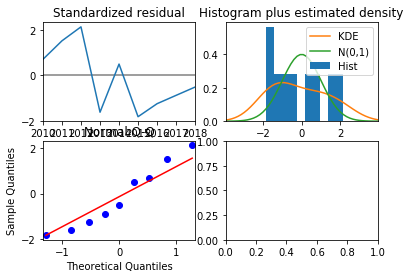

In [40]:
from pylab import rcParams

import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

train_sample = pd.concat([df_['Lionel Messi']["Rating"].diff().iloc[1:],df_['Cristiano Ronaldo']["Rating"].diff().iloc[1:]],axis=1)
model = sm.tsa.VARMAX(train_sample,order=(2,1),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=1)
result.plot_diagnostics()
# # calculating error
# rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1].values, predicted_result.values))
# print("The root mean squared error is {}.".format(rmse))

In [23]:
train_sample

,Rating,Rating
Season,,
2010-01-01,0.09,-0.19
2011-01-01,0.12,-0.07
2012-01-01,-0.05,-0.13
2013-01-01,-0.49,0.12
2014-01-01,0.50,0.21
2015-01-01,-0.38,-0.49
2016-01-01,0.01,-0.38
2017-01-01,0.21,0.33
2018-01-01,-0.20,-0.26


In [18]:
df_['Lionel Messi']

,Name,Age,Team,League,Position,Apps,Minutes,Total goals,Total Assists,Shots per game,...,Pass success percentage,Crosses per game,Long balls per game,Through balls per game,Total Goals,Yellow cards,Red cards,Aerials won per game,Man of the match,Rating
Season,,,,,,,,,,,,,,,,,,,,,
2009-01-01,Lionel Messi,23.0,Barcelona,LaLiga,"AM(CR),FW",30.0,2841.0,34,10,4.7,...,85.7,0.6,1.3,0.7,34,3,0,0.2,14,8.67
2010-01-01,Lionel Messi,24.0,Barcelona,LaLiga,"AM(CR),FW",31.0,2859.0,31,18,4.5,...,86.2,0.2,1.4,1,31,3,0,0.1,20,8.76
2011-01-01,Lionel Messi,25.0,Barcelona,LaLiga,"AM(CR),FW",36.0,3268.0,50,16,5.5,...,84.2,0.4,1.4,1.5,50,6,0,0.1,24,8.88
2012-01-01,Lionel Messi,26.0,Barcelona,LaLiga,"AM(CR),FW",28.0,2644.0,46,12,5.1,...,85.2,0.2,2.1,0.4,46,1,0,0.2,19,8.83
2013-01-01,Lionel Messi,27.0,Barcelona,LaLiga,"AM(CR),FW",29.0,2508.0,27,11,5,...,84.9,0.3,1.1,0.4,27,2,0,0.2,13,8.34
2014-01-01,Lionel Messi,28.0,Barcelona,LaLiga,"AM(CR),FW",37.0,3375.0,43,18,4.9,...,82.9,0.5,2.7,0.9,43,4,0,0.2,25,8.84
2015-01-01,Lionel Messi,29.0,Barcelona,LaLiga,"AM(CR),FW",31.0,2730.0,26,16,4.8,...,81.9,0.4,3.5,1,26,3,0,0.2,13,8.46
2016-01-01,Lionel Messi,30.0,Barcelona,LaLiga,"AM(CR),FW",32.0,2833.0,37,9,5.3,...,80.2,0.3,2.7,0.6,37,6,0,0.2,16,8.47
2017-01-01,Lionel Messi,31.0,Barcelona,LaLiga,"AM(CR),FW",32.0,2997.0,34,12,5.5,...,81.2,0.3,2.1,0.5,34,3,0,0.2,22,8.68


In [20]:
decadeOfPLayerDf.loc[decadeOfPLayerDf['Name'] == 'Lionel Messi']['Rating']

Season,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
122,8.67,8.76,8.88,8.83,8.34,8.84,8.46,8.47,8.68,8.48


In [13]:
players09 = combinedPlayerDataframe[(combinedPlayerDataframe.Season == '2009')]
players09 = players09[['Name', 'Season', 'Rating']]

players10 = combinedPlayerDataframe[(combinedPlayerDataframe.Season == '2010')]
players10 = players10[['Name', 'Season', 'Rating']]

players11 = combinedPlayerDataframe[(combinedPlayerDataframe.Season == '2011')]
players11 = players11[['Name', 'Season', 'Rating']]

players12 = combinedPlayerDataframe[(combinedPlayerDataframe.Season == '2012')]
players12 = players12[['Name', 'Season', 'Rating']]

players13 = combinedPlayerDataframe[(combinedPlayerDataframe.Season == '2013')]
players13 = players13[['Name', 'Season', 'Rating']]

players14 = combinedPlayerDataframe[(combinedPlayerDataframe.Season == '2014')]
players14 = players14[['Name', 'Season', 'Rating']]

players15 = combinedPlayerDataframe[(combinedPlayerDataframe.Season == '2015')]
players15 = players15[['Name', 'Season', 'Rating']]

players16 = combinedPlayerDataframe[(combinedPlayerDataframe.Season == '2016')]
players16 = players16[['Name', 'Season', 'Rating']]

players17 = combinedPlayerDataframe[(combinedPlayerDataframe.Season == '2017')]
players17 = players17[['Name', 'Season', 'Rating']]

players18 = combinedPlayerDataframe[(combinedPlayerDataframe.Season == '2018')]
players18 = players18[['Name', 'Season', 'Rating']]

allPLayers = combinedPlayerDataframe[['Name', 'Season', 'Rating', 'Age']]
#allPLayers = combinedPlayerDataframe
allPLayers = allPLayers.assign(id=(allPLayers['Name']).astype('category').cat.codes)
del allPLayers['Name']
#del allPLayers['Team']
#del allPLayers['League']
#del allPLayers['Position']
cols = allPLayers.columns.tolist()
cols.insert(0, cols.pop(cols.index('id')))
allPLayers = allPLayers.reindex(columns= cols)
allPLayers["Season"] = pd.to_numeric(allPLayers["Season"])
allPLayers['id'] = allPLayers['id'].astype(np.int16)
#allPLayers['Rating'] = allPLayers['Rating'].astype(np.int16)
#allPLayers["Rating"] = 10 * allPLayers["Rating"]
#allPLayers['Rating'] = allPLayers['Rating'].astype(np.int16)
allPLayers.dtypes

id          int16
Season      int64
Rating    float64
Age         int64
dtype: object

In [8]:
from pandas import Series
from pandas import DataFrame
from pandas import concat

allPLayers = allPLayers.sort_values(['Season', 'id'])
allPLayers.head()

players_ratings_df2 = allPLayers.copy()
players_ratings_df2['Last_Season_Rating'] = players_ratings_df2.groupby(['id'])['Rating'].shift()
players_ratings_df2['Last_Season_Diff'] = players_ratings_df2.groupby('id')['Last_Season_Rating'].transform(Series.diff)
players_ratings_df2 = players_ratings_df2.dropna()
# players_ratings_df2 = players_ratings_df2.fillna(-99999, inplace=True)
players_ratings_df2.head()

,id,Season,Rating,Last_Season_Rating,Last_Season_Diff
514,6407,2009,6.11,6.56,-0.50
349,6407,2009,6.66,6.11,-0.45
412,38,2010,6.47,7.04,0.14
181,50,2010,6.84,6.93,0.18
471,140,2010,6.31,6.98,-0.15


In [11]:
 from sklearn.metrics import mean_squared_log_error

def rmsle(ytrue, ypred):
    return np.sqrt(mean_squared_log_error(ytrue, ypred))

In [29]:
# from sklearn.metrics import mean_squared_log_error

# mean_error = []
# for season in range(2016,2018):
#     train = melt3[melt3['Season'] < season]
#     val = melt3[melt3['Season'] == season]

#     p = val['Last_Season_Rating'].values

#     error = rmsle(val['Rating'].values, p)
#     print('Season %d - Error %.5f' % (season, error))
#     mean_error.append(error)
# print('Mean Error = %.5f' % np.mean(mean_error))

In [127]:
from sklearn.ensemble import RandomForestRegressor

mean_error = []
for season in range(2018,2019):
    train = players_ratings_df2[players_ratings_df2['Season'] < season]
    val = players_ratings_df2[players_ratings_df2['Season'] == season]

    xtr, xts = train.drop(['Rating'], axis=1), val.drop(['Rating'], axis=1)
    ytr, yts = train['Rating'].values, val['Rating'].values
    

    mdl = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=0, min_samples_split = 60,  
                                min_samples_leaf=5, max_depth = 30, max_features = 'sqrt')
    mdl.fit(xtr, ytr)
    

    p = mdl.predict(xts)

    error = rmsle(yts, p)
    print('Week %d - Error %.5f' % (season, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))



Week 2018 - Error 0.03725
Mean Error = 0.03725


In [128]:
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
scores = cross_val_score(mdl, xts, yts, cv=10)
print(scores)
print(scores.mean())
# seed = 7
# kfold = model_selection.KFold(n_splits=10, random_state=seed)
# scoring = 'r2'
# results = model_selection.cross_val_score(mdl, xts, yts, cv=kfold, scoring=scoring)
# print("RandomForestRegressor")
# print(results.mean(), results.std())

[0.15920476 0.37818478 0.33494965 0.35423169 0.28141943 0.38507443
 0.28868296 0.21551984 0.30717362 0.21741405]
0.2921855224986535


In [13]:
from sklearn import linear_model 

mean_error = []
for season in range(2015,2019):
    train = players_ratings_df2[players_ratings_df2['Season'] < season]
    val = players_ratings_df2[players_ratings_df2['Season'] == season]

    xtr, xts = train.drop(['Rating'], axis=1), val.drop(['Rating'], axis=1)
    ytr, yts = train['Rating'].values, val['Rating'].values

    reg = linear_model.LinearRegression(n_jobs=-1) 
    
    reg.fit(xtr, ytr)
    

    p = reg.predict(xts)

    error = rmsle(yts, p)
    print('Week %d - Error %.5f' % (season, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

Week 2015 - Error 0.04096
Week 2016 - Error 0.04112
Week 2017 - Error 0.03965
Week 2018 - Error 0.03716
Mean Error = 0.03972


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
scores = cross_val_score(reg, xts, yts, cv=10)
print(scores)
print(scores.mean())
# seed = 7
# kfold = model_selection.KFold(n_splits=10, random_state=seed)
# scoring = 'r2'
# results = model_selection.cross_val_score(mdl, xts, yts, cv=kfold, scoring=scoring)
# print("RandomForestRegressor")
# print(results.mean(), results.std())

[0.13931874 0.36515774 0.31461827 0.39416119 0.26981654 0.42669475
 0.31161415 0.23683048 0.31501303 0.26136861]
0.30345934933098234


In [125]:
from sklearn.tree import DecisionTreeRegressor

mean_error = []
for season in range(2016,2019):
    train = players_ratings_df2[players_ratings_df2['Season'] < season]
    val = players_ratings_df2[players_ratings_df2['Season'] == season]

    xtr, xts = train.drop(['Rating'], axis=1), val.drop(['Rating'], axis=1)
    ytr, yts = train['Rating'].values, val['Rating'].values

    reg = DecisionTreeRegressor()
    
    reg.fit(xtr, ytr)
    

    p = reg.predict(xts)

    error = rmsle(yts, p)
    print('Week %d - Error %.5f' % (season, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

Week 2016 - Error 0.06005
Week 2017 - Error 0.05807
Week 2018 - Error 0.05574
Mean Error = 0.05795


In [126]:
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
scores = cross_val_score(reg, xts, yts, cv=10)
print(scores)
print(scores.mean())

[-2.604586   -0.44406252 -0.42025721 -0.24261227 -0.24085847 -0.11131196
 -0.56022762 -0.26257626 -0.09861617 -0.67322697]
-0.5658335449715429


In [17]:
import xgboost as xgb

mean_error = []
for season in range(2016,2019):
    train = players_ratings_df2[players_ratings_df2['Season'] < season]
    val = players_ratings_df2[players_ratings_df2['Season'] == season]

    xtr, xts = train.drop(['Rating'], axis=1), val.drop(['Rating'], axis=1)
    ytr, yts = train['Rating'].values, val['Rating'].values

    reg = xgb.XGBRegressor(objective ='reg:squarederror', max_depth=2, subsample=1, n_estimators=70)
    
    reg.fit(xtr, ytr)
    

    p = reg.predict(xts)

    error = rmsle(yts, p)
    print('Week %d - Error %.5f' % (season, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

Week 2016 - Error 0.03413
Week 2017 - Error 0.03242
Week 2018 - Error 0.03113
Mean Error = 0.03256


In [18]:
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
scores = cross_val_score(reg, xts, yts, cv=10)
print(scores)
print(scores.mean())

[0.56093713 0.61253901 0.59792749 0.63762413 0.63415173 0.65032977
 0.53448676 0.59836119 0.60749006 0.65852724]
0.6092374502510054


In [14]:
idList = allPLayers.id.unique()

meanDf = pd.DataFrame(columns=['Mean'])

#idList = allPLayers.id

for idx in idList:
    mean = allPLayers.loc[allPLayers.id == idx]['Rating'].mean()
    length = len(allPLayers.loc[allPLayers.id == idx]['Rating'])
    growth = allPLayers.loc[allPLayers.id == idx]['Rating'].tolist()[length-1] - allPLayers.loc[allPLayers.id == idx]['Rating'].tolist()[0]
    meanDf.set_value(idx, 'id', idx)
    meanDf.set_value(idx, 'Mean', mean)
    meanDf.set_value(idx, 'Growth', growth)
    
df3 = pd.merge(allPLayers, meanDf, on=['id'])

allPLayers = df3

allPLayers['Mean'] = allPLayers['Mean'].astype(np.float64)

In [15]:
from pandas import Series
from pandas import DataFrame
from pandas import concat

allPLayers = allPLayers.sort_values(['Season', 'id'])
allPLayers.head()

players_ratings_df2 = allPLayers.copy()
players_ratings_df2['Last_Season_Rating'] = players_ratings_df2.groupby(['id'])['Rating'].shift()
players_ratings_df2['Last_Season_Diff'] = players_ratings_df2.groupby('id')['Last_Season_Rating'].transform(Series.diff)
players_ratings_df2 = players_ratings_df2.dropna()
# players_ratings_df2 = players_ratings_df2.fillna(-99999, inplace=True)
players_ratings_df2.head()

,id,Season,Rating,Age,Mean,Growth,Last_Season_Rating,Last_Season_Diff
9941,6407,2009,6.11,21,6.657692,-0.40,6.56,-0.50
9951,6407,2009,6.66,24,6.657692,-0.40,6.11,-0.45
10334,38,2010,6.47,27,6.866667,-0.15,7.04,0.14
17326,50,2010,6.84,24,6.634000,-0.59,6.93,0.18
9830,140,2010,6.31,29,6.975000,-0.82,6.98,-0.15


In [16]:
from sklearn import linear_model 

mean_error = []
for season in range(2016,2019):
    train = players_ratings_df2[players_ratings_df2['Season'] < season]
    val = players_ratings_df2[players_ratings_df2['Season'] == season]

    xtr, xts = train.drop(['Rating'], axis=1), val.drop(['Rating'], axis=1)
    ytr, yts = train['Rating'].values, val['Rating'].values

    reg = linear_model.LinearRegression(n_jobs=-1) 
    
    reg.fit(xtr, ytr)
    

    p = reg.predict(xts)

    error = rmsle(yts, p)
    print('Week %d - Error %.5f' % (season, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

from sklearn.model_selection import cross_val_score
from sklearn import model_selection
scores = cross_val_score(reg, xts, yts, cv=10)
print(scores)
print(scores.mean())

Week 2016 - Error 0.03357
Week 2017 - Error 0.03184
Week 2018 - Error 0.03073
Mean Error = 0.03205
[0.64237557 0.66502509 0.62905652 0.61525597 0.67858159 0.68965338
 0.55453459 0.60121666 0.61680105 0.70590412]
0.639840454907039
